In [228]:
import pandas as pd
import re

In [229]:
from matplotlib import pyplot as plt
import seaborn as sns

In [230]:
import arabic_reshaper
from bidi.algorithm import get_display

In [231]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from yellowbrick.text import FreqDistVisualizer
import yake
from nltk.corpus import stopwords

## Read Preprocessed Data

In [232]:
import pickle

with open('../metadata/articles_raw_and_clean.pickle', 'rb') as f:
    corpus_df = pickle.load(f)

corpus_df.shape

(7484, 4)

In [234]:
corpus_df.head()

,title,date_dt,raw_doc,clean_doc
0,في كافّة الولايات : عصابة تورط حزبا كبيرا في ع...,2020-02-24,,
1,تجار ومواطنون يغلقون الطريق المؤدية الى معبر ح...,2020-02-24,,
2,بنزرت : الإطاحة بعصابة نفذت عملية سطو على منزل,2020-02-24,,
3,في الوردية : يهدد العاملات بسكين ثم يسلبهن,2020-02-24,,
4,الإعدام شنقا في حق مغتصب وقاتل طفلة الـ7 سنوات...,2020-02-24,,


*****

****

## Extract Common Vocabulary

In [235]:
stopwords_ar = stopwords.words('arabic')
len(stopwords_ar)

248

In [236]:
stopwords_ar

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [237]:
MIN_DOC_FREQ = 5
MAX_DOC_FREQ = 1.0
NGRAM_RANGE = (1,2)

In [238]:
#?CountVectorizer

In [239]:
count_bow_model = CountVectorizer(min_df=MIN_DOC_FREQ, max_df=MAX_DOC_FREQ, ngram_range=NGRAM_RANGE, stop_words=stopwords_ar)

count_bow_matrix = count_bow_model.fit_transform(corpus_df.clean_doc.tolist())
count_bow_vocab = count_bow_model.get_feature_names()
count_bow_matrix.shape,len(count_bow_vocab)

((7484, 23497), 23497)

In [240]:
count_bow_matrix.data.min(), count_bow_matrix.data.max()

(1, 69)

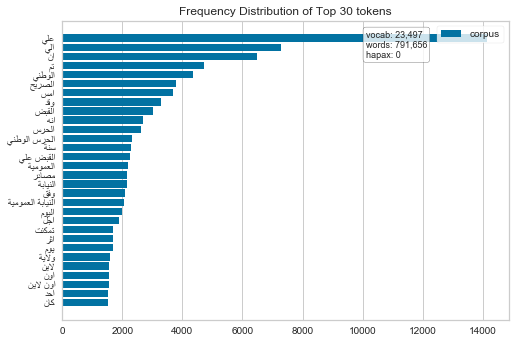

In [241]:
count_bow_vocab_reshaped = [get_display(arabic_reshaper.reshape(word)) for word in count_bow_vocab]
visualizer = FreqDistVisualizer(features=count_bow_vocab_reshaped, n=30)
visualizer.fit(count_bow_matrix)
visualizer.poof()

***

## Extract Keywords & Keyphrases

In [242]:
corpus_str = '\n'.join(corpus_df.clean_doc.tolist())

In [243]:
## initialize method
kw_extractor = yake.KeywordExtractor(lan="ar", n=1, top=50, features=None)

## execute method on our corpus
%time yake_keywords = kw_extractor.extract_keywords(corpus_str)
type(yake_keywords),type(yake_keywords[0])

Wall time: 1min 10s


(list, tuple)

In [244]:
yake_keywords

[('علي', 1.7395608740772426e-06),
 ('الي', 5.520704767266969e-06),
 ('الوطني', 1.1798690760311258e-05),
 ('القبض', 2.2668910110714856e-05),
 ('الحرس', 2.9627860230331025e-05),
 ('مصادر', 4.268505936110658e-05),
 ('النيابة', 4.3195059133487585e-05),
 ('العمومية', 4.8344075452891666e-05),
 ('وفق', 4.8901276164911474e-05),
 ('تمكنت', 6.970220308727926e-05),
 ('اون', 7.473246797160257e-05),
 ('ولاية', 7.703465540397164e-05),
 ('القاء', 8.199369471174417e-05),
 ('قضية', 8.523268193741757e-05),
 ('اذنت', 8.66432035030769e-05),
 ('مصدر', 8.710421814898233e-05),
 ('اعوان', 9.14121849517676e-05),
 ('تابعة', 9.208785369097228e-05),
 ('الامن', 0.00010385096951913647),
 ('حجز', 0.00010861225242292487),
 ('دورية', 0.0001098010955756106),
 ('وحدات', 0.00011192083369449674),
 ('علمت', 0.00012039809942706059),
 ('الابحاث', 0.0001324252951213321),
 ('تبين', 0.0001342100337278341),
 ('العدلية', 0.00013502729446980232),
 ('الاحتفاظ', 0.00013590604701317196),
 ('فرقة', 0.0001388463502370368),
 ('معه', 0.0

In [245]:
## initialize method
kw_extractor = yake.KeywordExtractor(lan="ar", n=2, top=50, features=None)

## execute method on our corpus
%time yake_keywords2 = kw_extractor.extract_keywords(corpus_str)
type(yake_keywords2),type(yake_keywords2[0])

Wall time: 48.9 s


(list, tuple)

In [246]:
yake_keywords2

[('القبض علي', 7.445025404190728e-07),
 ('الحرس الوطني', 1.7244091017718489e-06),
 ('علي', 1.7395608740772426e-06),
 ('النيابة العمومية', 4.803091599661616e-06),
 ('الي', 5.520704767266969e-06),
 ('القاء القبض', 5.73499214885503e-06),
 ('علي مستوي', 6.464157824599366e-06),
 ('الوطني علي', 6.939234061992775e-06),
 ('الامن الوطني', 9.130841309167644e-06),
 ('وفق مصادر', 9.353413038484042e-06),
 ('الوطني', 1.1798690760311258e-05),
 ('العثور علي', 1.2418017169227129e-05),
 ('العمومية اذنت', 1.3079276485946456e-05),
 ('علي عين', 1.5304133362174458e-05),
 ('وحدات الحرس', 1.7176885413322304e-05),
 ('علي متن', 1.7402439140221373e-05),
 ('الي المستشفي', 1.8054565998580236e-05),
 ('وذلك علي', 1.825863058707406e-05),
 ('دورية تابعة', 2.078470167805872e-05),
 ('علي خلفية', 2.1228263357451614e-05),
 ('اون لاين»', 2.1242244459836903e-05),
 ('القبض', 2.2668910110714856e-05),
 ('قضية عدلية', 2.4998796802076326e-05),
 ('علي مصدر', 2.6624916187641556e-05),
 ('مصدر امني', 2.7602147093048954e-05),
 ('الحر

****

## Extract Crime Vocabulary Based on Lexicon

In [247]:
## Read dictionary of crime related words

with open('../resources/Crime_ontology.txt', 'r', encoding='utf8') as f:
    crime_words_lexicon = f.read().split('\n')
    crime_words_lexicon = [word.strip() for word in crime_words_lexicon if word!='']
crime_words_lexicon = sorted(list(set(crime_words_lexicon)))
len(crime_words_lexicon)

88

In [248]:
crime_words_lexicon 

['ابحاث جارية',
 'اتهام',
 'اجتياز',
 'اجرام',
 'احباط',
 'احتجاز',
 'احتيال',
 'اختلاس',
 'ارتشاء',
 'استيلاء',
 'اشتباه',
 'اشتبه',
 'اضرام النار',
 'اعتداء',
 'اعتراف',
 'اعترف',
 'اعتقال',
 'اعتقل',
 'اغتصاب',
 'الجاني',
 'الجناة',
 'الشروط الصحية',
 'القاء القبض',
 'انتحار',
 'انتحر',
 'ايقاف',
 'براكاج',
 'تحت التهديد',
 'تحرش',
 'تحري',
 'تحريات',
 'تحيل',
 'تدليس',
 'ترويج',
 'تزييف',
 'تعمد',
 'تفتيش',
 'تفجير',
 'تم ضبط',
 'تهديد',
 'تهريب',
 'جثة',
 'جرائم',
 'جريمة',
 'جنسي',
 'حجز',
 'حدود',
 'حرق',
 'حيازة مخدرات',
 'خطير',
 'خطيرة',
 'خلسة',
 'دعارة',
 'دون رخصة',
 'رذيلة',
 'رشوة',
 'زطلة',
 'سجن',
 'سرقة',
 'سطو',
 'سفاح',
 'شاهد عيان',
 'شرطة',
 'شهود عيان',
 'ضحايا',
 'ضحية',
 'عصابة',
 'عملة',
 'عملية نوعية',
 'عنف',
 'غير صالح للاستهلاك',
 'غير صالحة للاستهلاك',
 'قبض على',
 'قتل',
 'لا تستجيب للشروط الصحية',
 'متاجرة مخدرات',
 'متلبس',
 'مجرم',
 'مخدرات',
 'مراقبة',
 'مروج',
 'مزيف',
 'مشتبه',
 'نهب',
 'هدد',
 'يشتبه',
 'يعتدي',
 'يعنف']

In [249]:
# First method: match each word separately

crime_words_df = pd.DataFrame(columns=crime_words_lexicon)
for word in crime_words_lexicon:
    #print(word)
    crime_words_df[word] = corpus_df.clean_doc.str.contains(word)

In [250]:
crime_words_df.shape

(7484, 88)

In [251]:
u = crime_words_df.sum(axis=0)

In [252]:
u.describe()

count      88.000000
mean      315.727273
std       420.335463
min         0.000000
25%        20.000000
50%       182.500000
75%       388.000000
max      1968.000000
dtype: float64

In [253]:
u[u<=5].sort_values()

جرائم                      0
حيازة مخدرات               0
قبض على                    0
متاجرة مخدرات              0
احتيال                     1
ارتشاء                     1
لا تستجيب للشروط الصحية    1
شاهد عيان                  3
الشروط الصحية              4
غير صالح للاستهلاك         4
dtype: int64

In [254]:
u.sort_values(ascending=False).head(30)

تحري           1968
حجز            1814
تفتيش          1655
القاء القبض    1634
سجن            1076
تحريات         1015
شرطة            967
اعتداء          925
اعترف           859
سرقة            829
عنف             827
تعمد            770
قتل             732
مخدرات          643
ايقاف           618
ترويج           591
خطير            587
تهديد           572
حدود            490
جثة             422
زطلة            396
جنسي            391
جريمة           387
ضحية            370
تهريب           353
مراقبة          343
اجرام           306
الجاني          276
عملة            275
خلسة            269
dtype: int64

In [255]:
u['استيلاء']

248

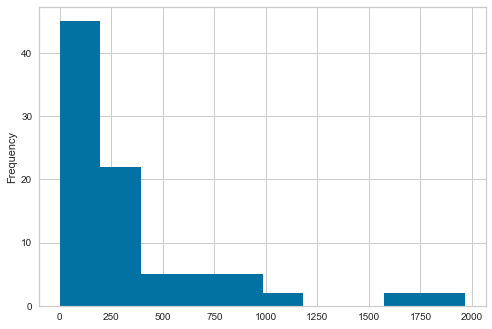

In [256]:
u.plot.hist()

Text(0.5, 0, 'word')

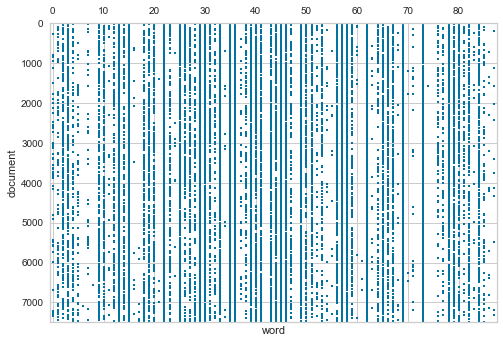

In [257]:
plt.spy(crime_words_df,precision=0, markersize=2, aspect='auto')
plt.ylabel('document')
plt.xlabel('word')

In [258]:
## Second method: using one regexp
## The problem with this method is that it can match at most one word; cannot match multiple words simultaneously

if False:
    u = '|'.join(['('+x+')' for x in crime_words_lexicon])
    crime_words_regexp = re.compile(u)

    idx = corpus_df.clean_doc.str.contains(crime_words_regexp)
    idx.mean()
    %time corpus_df['crime_words'] = corpus_df.clean_doc.str.extract(crime_words_regexp, expand=True)
    #%time corpus_df['crime_words'] = corpus_df.clean_doc.str.findall(crime_words_regexp).map(lambda x: [] if x==[] else [y for y in x[0] if y!=''])
    z = corpus_df.crime_words.notnull().sum(axis=0)
    z.index = crime_words
    z.sort_values(ascending=False)

***

## Temporal Analysis

In [260]:
corpus_df.date_dt.nunique()

353

In [261]:
corpus_df.date_dt.value_counts().head(30)

2020-02-17    37
2020-01-30    34
2019-12-07    33
2020-01-28    33
2020-02-07    33
2020-02-14    32
2020-01-29    32
2020-02-22    32
2019-03-22    31
2020-01-27    31
2019-07-04    31
2019-05-24    31
2020-01-31    31
2019-03-25    31
2019-12-14    30
2019-12-16    30
2020-02-01    30
2019-08-05    30
2019-12-19    29
2019-10-03    29
2019-11-07    29
2020-02-04    29
2020-02-08    29
2019-05-11    29
2019-08-29    29
2019-04-08    29
2019-11-23    29
2019-08-03    29
2020-02-10    29
2019-06-08    29
Name: date_dt, dtype: int64

In [262]:
corpus_df.date_dt.value_counts().tail()

2019-04-07    7
2019-08-11    7
2019-05-05    6
2019-03-31    6
2019-06-05    3
Name: date_dt, dtype: int64

In [263]:
corpus_df.sort_values(by='date_dt',inplace=True)

In [265]:
corpus_df.date_dt.iloc[0].month,corpus_df.date_dt.iloc[-1].month

(3, 2)

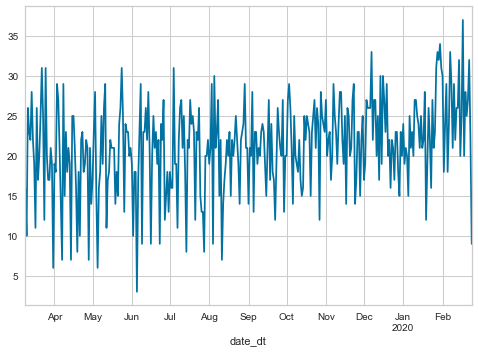

In [266]:
# Total number of articles by day

corpus_df.groupby('date_dt')['title'].count().plot()

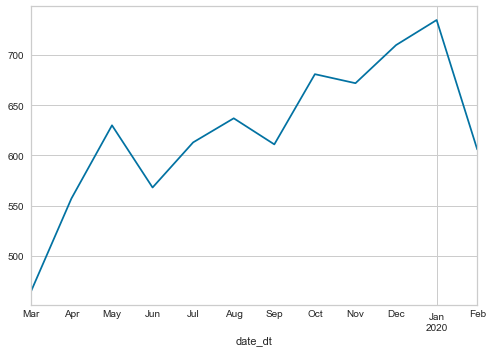

In [267]:
# Total number of articles by month

corpus_df.groupby('date_dt')['title'].count().resample(rule='M').sum().plot()

In [268]:
crime_words_df.shape

(7484, 88)

In [269]:
corpus_df.shape

(7484, 4)

In [270]:
crime_words_df.head()

,ابحاث جارية,اتهام,اجتياز,اجرام,احباط,احتجاز,احتيال,اختلاس,ارتشاء,استيلاء,...,مخدرات,مراقبة,مروج,مزيف,مشتبه,نهب,هدد,يشتبه,يعتدي,يعنف
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [271]:
top_words_df = crime_words_df.sum(axis=0).sort_values(ascending=False).head(30)

In [272]:
top_words_df.head()

تحري           1968
حجز            1814
تفتيش          1655
القاء القبض    1634
سجن            1076
dtype: int64

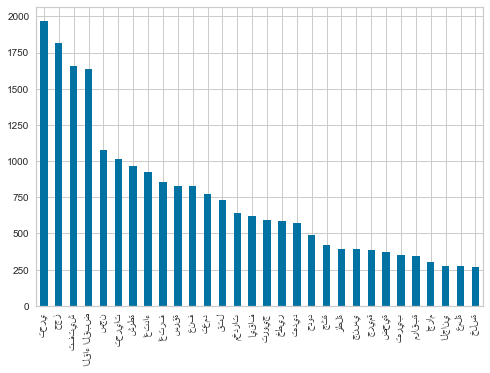

In [273]:
top_words_df.plot.bar()

In [274]:
crime_words_df.set_index(corpus_df.date_dt.iloc[0:crime_words_df.shape[0]],inplace=True)
crime_words_df.head()

,ابحاث جارية,اتهام,اجتياز,اجرام,احباط,احتجاز,احتيال,اختلاس,ارتشاء,استيلاء,...,مخدرات,مراقبة,مروج,مزيف,مشتبه,نهب,هدد,يشتبه,يعتدي,يعنف
date_dt,,,,,,,,,,,,,,,,,,,,,
2019-03-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-03-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-03-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-03-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-03-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [275]:
special_crime_words = top_words_df.index.tolist()
special_crime_words = [ 'سرقة','سطو','اغتصاب','براكاج','قتل','زطلة','مخدرات' ,'تهريب','تدليس','مزيف','دعارة','رذيلة','انتحر','انتحار','حرق','تفجير']

In [276]:
u = crime_words_df.groupby('date_dt')[special_crime_words].agg('sum')
u.sum(axis=0).sort_values(ascending=False)

سرقة      829.0
قتل       732.0
مخدرات    643.0
زطلة      396.0
تهريب     353.0
براكاج    238.0
اغتصاب    230.0
سطو       199.0
انتحار    157.0
حرق       149.0
تدليس      97.0
مزيف       86.0
دعارة      48.0
تفجير      46.0
رذيلة      20.0
انتحر       9.0
dtype: float64

In [277]:
z = u.sum(axis=1)
u.shape,z.shape

((353, 16), (353,))

In [278]:
if False:
    u.columns = [get_display(arabic_reshaper.reshape(x)) for x in u.columns]
    for i in range(u.shape[1]):
        (u.iloc[:,i]/z).plot()
        plt.title(u.columns[i])
        plt.show()

In [279]:
u2 = u.resample(rule='M').sum()
u2.head()

,سرقة,سطو,اغتصاب,براكاج,قتل,زطلة,مخدرات,تهريب,تدليس,مزيف,دعارة,رذيلة,انتحر,انتحار,حرق,تفجير
date_dt,,,,,,,,,,,,,,,,
2019-03-31,70.0,16.0,14.0,30.0,39.0,40.0,59.0,38.0,7.0,7.0,6.0,1.0,0.0,13.0,7.0,1.0
2019-04-30,85.0,29.0,9.0,53.0,39.0,43.0,63.0,44.0,7.0,6.0,2.0,0.0,1.0,6.0,17.0,2.0
2019-05-31,74.0,16.0,11.0,22.0,51.0,36.0,70.0,32.0,9.0,7.0,5.0,4.0,0.0,11.0,14.0,6.0
2019-06-30,65.0,9.0,16.0,11.0,58.0,27.0,49.0,36.0,10.0,8.0,4.0,2.0,0.0,16.0,11.0,2.0
2019-07-31,67.0,16.0,23.0,16.0,83.0,38.0,64.0,25.0,10.0,12.0,7.0,2.0,1.0,4.0,13.0,6.0


In [280]:
u.shape,u2.shape

((353, 16), (12, 16))

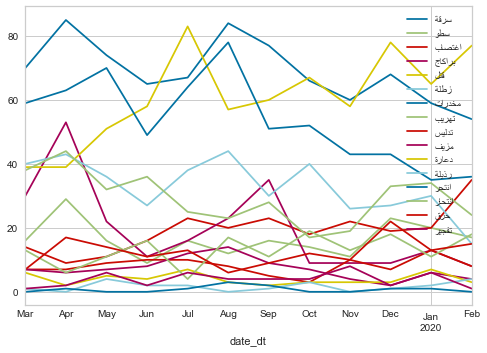

In [281]:
u2.columns = [get_display(arabic_reshaper.reshape(x)) for x in u2.columns]
u2.plot()

In [282]:
z2 = u2.sum(axis=1)
u2.shape,z2.shape

((12, 16), (12,))

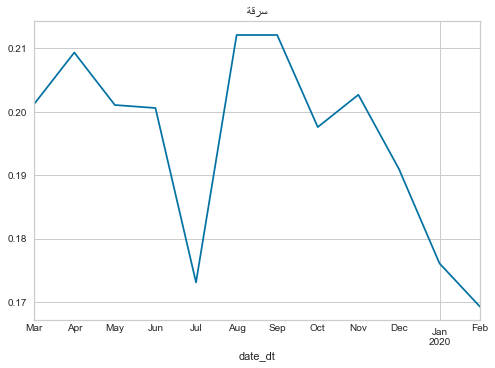

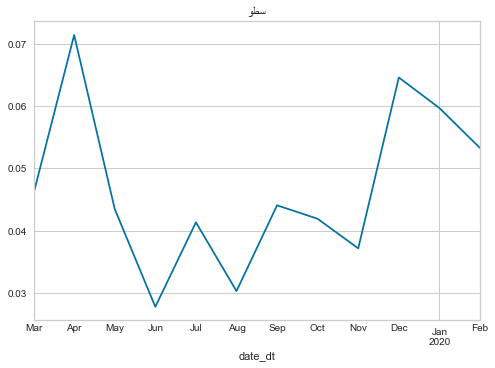

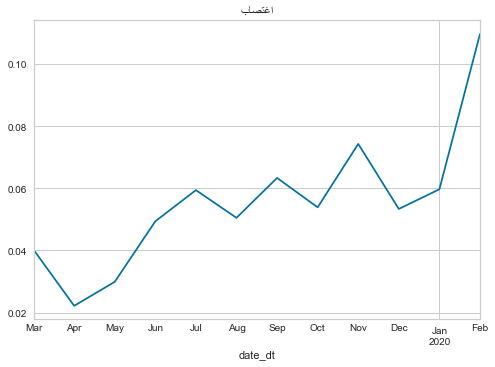

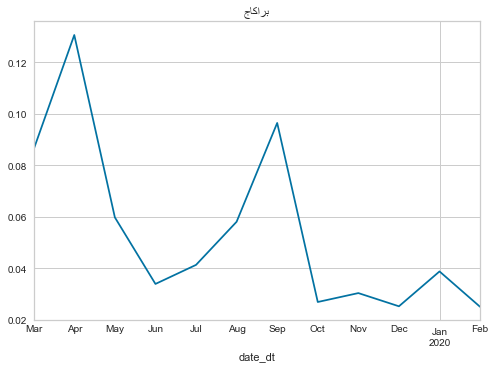

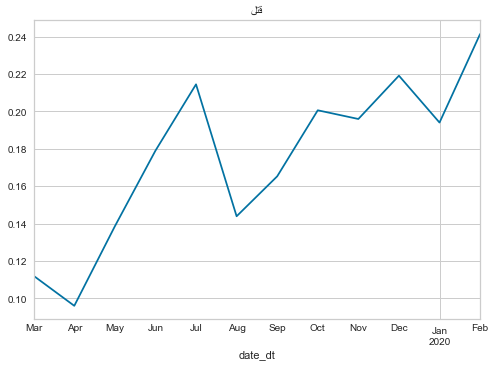

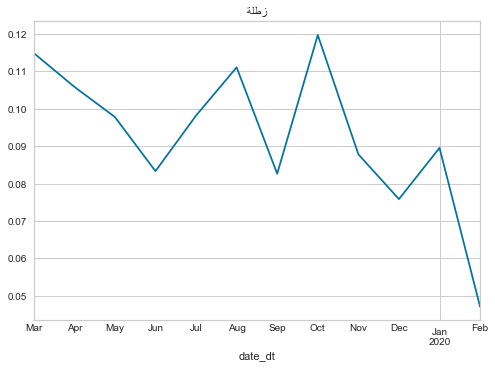

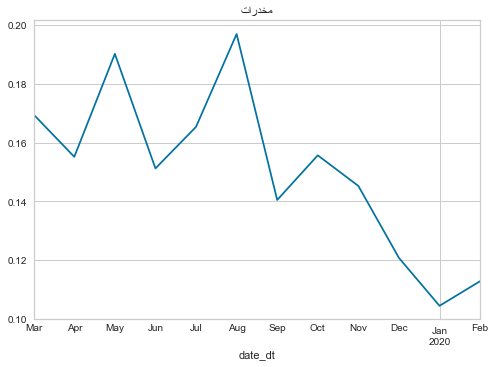

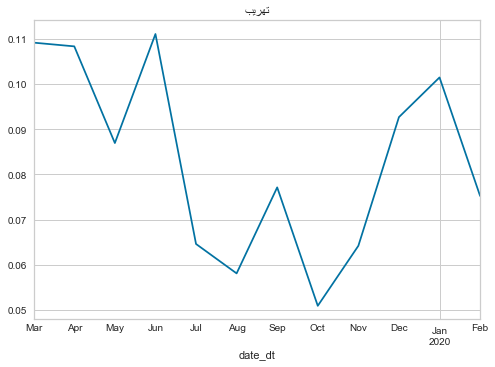

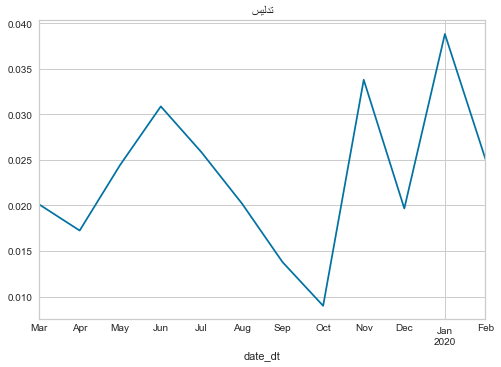

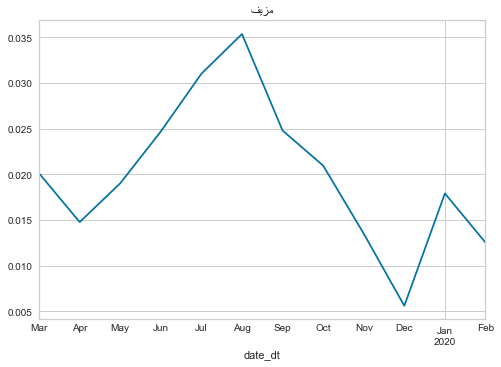

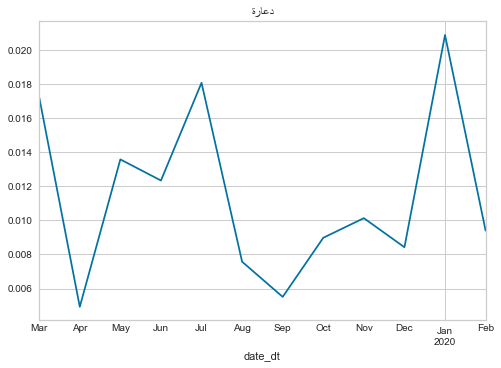

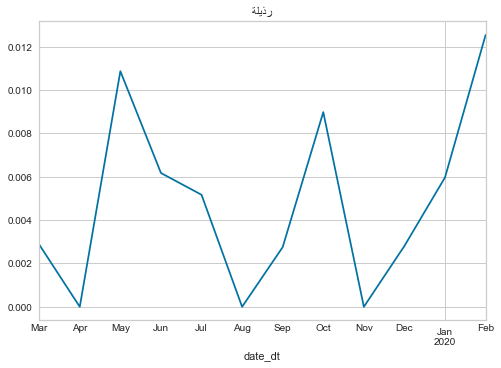

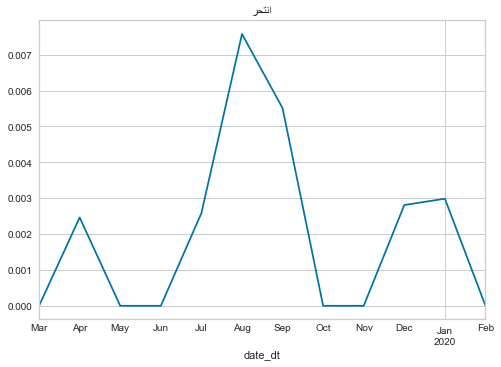

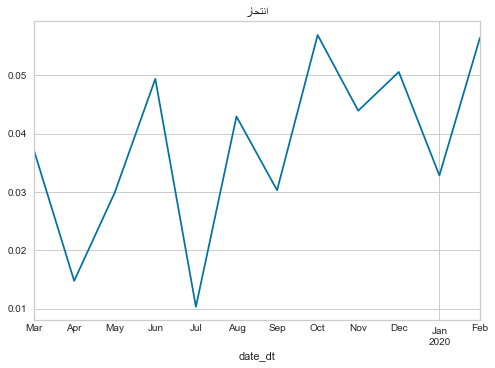

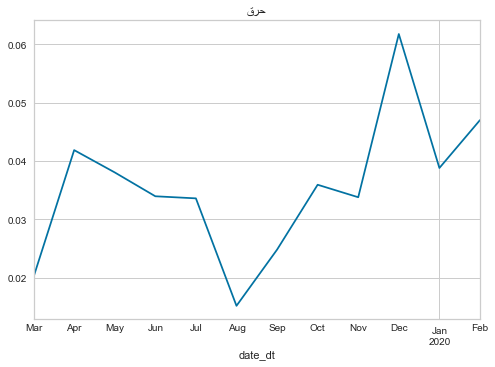

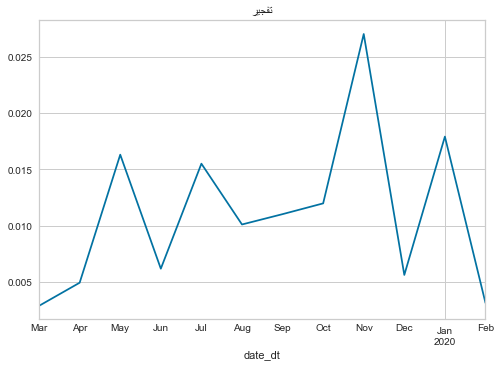

In [283]:
for i in range(u2.shape[1]):
    (u2.iloc[:,i]/z2).plot()
    plt.title(u2.columns[i])
    plt.show()